In [7]:
from dotenv import load_dotenv, find_dotenv
find_dotenv()
load_dotenv()

True

In [8]:
from langchain_ollama import ChatOllama

def add(a:int, b:int):
    """add a and b

    Args:
        a: first int
        b: second int
    """
    return a+b

llm = ChatOllama(model="llama3.1:latest")
llm_with_tools = llm.bind_tools([add])

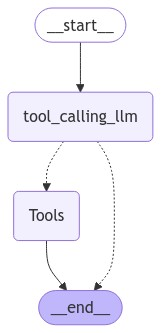

In [21]:
from IPython.display import display, Image
from langgraph.graph import START,END, StateGraph
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage

#define the Nodes as callable function


def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}
# We dont need to define a Toolnode, because we use a prebuild one

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("Tools", ToolNode([add]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("Tools", END)

graph = builder.compile()

#View
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages = graph.invoke({"messages":HumanMessage(content="add 3 and 5")})


AttributeError: 'function' object has no attribute 'invoke'